In [1]:
# Auto-reloading imports on external change. Re-import is necessary though.
%load_ext autoreload
%autoreload 2

from pathlib import Path

import os
import sys
# root = Path().resolve().parents[1]
# sys.path.append(str(root))

import numpy as np
import tensorflow as tf

/Users/tomdr/.pyenv/versions/3.7.3/envs/KLM/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/tomdr/.pyenv/versions/3.7.3/envs/KLM/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/tomdr/.pyenv/versions/3.7.3/envs/KLM/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/tomdr/.pyenv

In [5]:
from model import load_trained_model

from sudoku.image_parser import (
    load_image,
    parse_grid
)

from sudoku.plotting import (
    show_image,
    image_from_digits,
    plot_many_images
)

3-example.jpg


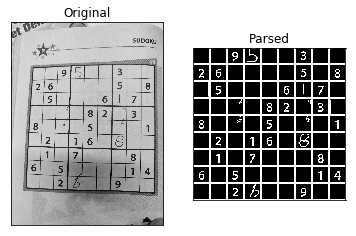

.DS_Store
1-example.jpeg
2-example.png


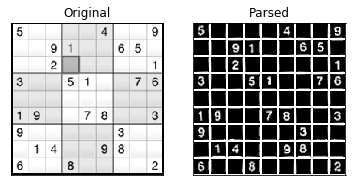

4.jpg


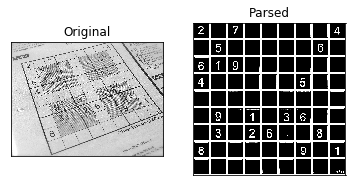

.ipynb_checkpoints
5.jpg


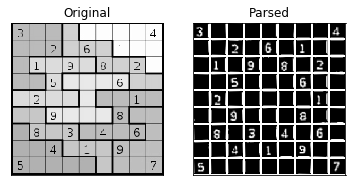

6.png


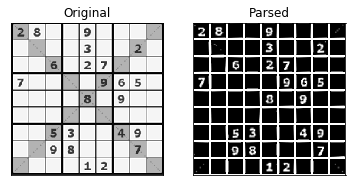

In [6]:
def plot_example(path):
    img = load_image(path)
    digits = parse_grid(img)
    digit_img = image_from_digits(digits)
    plot_many_images([img, digit_img], ['Original', 'Parsed'])


for filename in os.listdir('data/examples/'):
    print(filename)
    if filename.endswith(".jpg") or filename.endswith(".png"): 
         plot_example('data/examples/' + filename)

In [7]:
def parse_sudoku(path):
    img = load_image(path)
    digits = parse_grid(img)
    digit_img = image_from_digits(digits)

    model = load_trained_model("model_weights.hdf5")
    sudoku = extract_sudoku(digits, model)
    
    print(sudoku)
    show_image(digit_img)
    return sudoku

def extract_sudoku(digits, model):
    a = [0]*81
    for i in range(len(digits)):
        if (digits[i]/255).mean()==0.0:
            a[i] = np.nan
        else:
            img_erode = digits[i]    
            img = ((img_erode)/255).reshape(1, 28, 28, 1)
            pred = model.predict(img)
            a[i] = pred.argmax()
    return np.array(a).reshape(9, 9)            

In [8]:
# for filename in os.listdir('data/examples/'):
#     print(filename)
#     if filename.endswith(".jpg") or filename.endswith(".png"): 
#          parse_sudoku('data/examples/' + filename)

In [5]:
from optimizer import solve_sudoku

W0108 12:07:21.199329 4482145728 deprecation.py:506] From /Users/tomdr/.pyenv/versions/3.7.3/envs/KLM/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


[[ 0.  0. nan  6.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  7.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  7.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [nan  0. nan  0.  0.  0.  0.  0.  0.]
 [ 0. nan  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]]


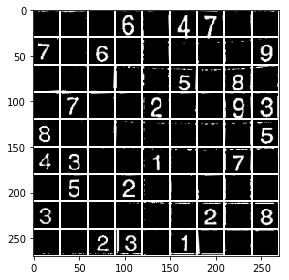

In [9]:
sudoku = parse_sudoku('data/examples/1-example.jpeg')

In [59]:
where_are_nans = np.isnan(sudoku)
sudoku[where_are_nans] = 0

In [60]:
sol_matrix = solve_sudoku(sudoku)

[[1 4 9 5 7 8 3 6 2]
 [2 6 7 3 9 1 5 4 8]
 [3 5 8 2 4 6 1 7 9]
 [5 9 1 4 8 2 6 3 7]
 [8 7 6 9 5 3 4 2 1]
 [4 2 3 1 6 7 8 9 5]
 [9 1 4 7 3 5 2 8 6]
 [6 3 5 8 2 9 7 1 4]
 [7 8 2 6 1 4 9 5 3]]


In [17]:
sol_matrix.shape

(9, 9)